<a href="https://colab.research.google.com/github/IshaPerry/tinder-lovoo-trends/blob/main/Dating_App_%26_STD_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection and Cleaning


## Downloaded Dataset 


In [ ]:
def data_parser(filename):
  import pandas as pd
  import numpy as np
  pd.options.mode.chained_assignment = None 
  df = pd.read_csv(filename)
  #Selecting desired columns from original CSV 
  df1 = df[["gender", "genderLooking", "age", "counts_pictures", 
            "counts_profileVisits", "counts_kisses", 
            "counts_fans", "lang_count", "shareProfileEnabled","country",
            "lang_fr", "lang_en", "lang_de", "lang_it", "lang_es", "lang_pt"]]
  #Renaming columns
  df1.rename(columns = {"gender":"Gender", "age" : "Age", "genderLooking":"Preferred_gender", 
                        "counts_pictures":"Number_of_pics", "counts_profileVisits":"Profile_visits",
                        "counts_kisses":"Num_of_kisses","counts_fans":"Num_of_fans", "lang_count":"Num_of_langs",
                        "shareProfileEnabled":"Public_account", "lang_fr": "French", "lang_en":"English",
                        "lang_de":"German", "lang_it":"Italian", "lang_es" : "Spanish", "lang_pt" :"Portuguese" }, 
             inplace = True)
  #Try-except block to prevent divide by zero error when calculating profile success rate in percentage 
  try:
     df1["Profile_Success_Percentage"] = ((df1["Num_of_kisses"]/df1["Profile_visits"])*100).round(3)
  except ZeroDivisionError:
    return 0.0 #prints 0 instead of error
  #Changed "Public_account" to boolean data type from int for easier manipulation
  df1["Public_account"] = df1.apply(lambda x: True if x["Public_account"] == 1 else False , axis = 1)
  #Resetting the index
  df1.reset_index(drop=True, inplace=True)
  #Putting the cleaned data into a seperate CSV file 
  df1.to_csv("cleaned_lovoo.csv", index = True)
  return df1





############ Function Call ############
data_parser("/content/lovoo_v3_users_api-results.csv")

,Gender,Preferred_gender,Age,Number_of_pics,Profile_visits,Num_of_kisses,Num_of_fans,Num_of_langs,Public_account,country,French,English,German,Italian,Spanish,Portuguese,Profile_Success_Percentage
0,F,M,25,4,8279,239,0,1,True,CH,False,False,True,False,False,False,2.887
1,F,M,22,5,663,13,0,3,True,CH,True,False,True,True,False,False,1.961
2,F,M,21,4,1369,88,0,0,True,CH,False,False,False,False,False,False,6.428
3,F,none,20,3,22187,1015,2,2,True,CA,True,True,False,False,False,False,4.575
4,F,M,21,12,35262,1413,9,1,True,DE,False,False,True,False,False,False,4.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,1,280,15,0,1,True,TR,True,False,False,False,False,False,5.357
3969,F,M,20,8,1014,43,3,1,True,CH,True,False,False,False,False,False,4.241
3970,F,M,20,8,1101,46,3,1,True,CH,True,False,False,False,False,False,4.178
3971,F,M,23,8,8702,142,0,2,False,CH,False,True,True,False,False,False,1.632


## Web Collection #1


In [ ]:
def web_parser1():
  from pandas._libs.algos import diff_2d
  #imports necessarily to scrape the webpage using selenium
  import sys
  sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
  from selenium import webdriver
  from selenium.webdriver.common.by import By
  import pandas as pd


  #set up selenium Chrome webdriver 
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',options=chrome_options)

  #retrieve and load webpage
  wd.get("https://www.businessofapps.com/data/tinder-statistics/")
  wd.maximize_window()
  wd.implicitly_wait(500)

  #Retrieve Tinder user age demographic data for Table 1 
  ages = [age.text for age in wd.find_elements(By.XPATH, "//table[@id='footable_76411']/tbody/tr/td[1]")]
  #ages = [wd.find_element(By.XPATH, "//table[@id='footable_76411']/tbody/tr[1]/td[1]").text] + ages
  #for age in ages:
    #print(age)

  #Retieve Tinder percentage of users for Table 1, Table 2, and Table 3  
  percent_of_user_table1 = [user.text for user in wd.find_elements(By.XPATH, "//table[@id='footable_76411']/tbody/tr/td[2]")]
  percent_of_user_table2 = [user.text for user in wd.find_elements(By.XPATH, "//table[@id='footable_76412']/tbody/tr/td[2]")]
  percent_of_user_table3 = [user.text for user in wd.find_elements(By.XPATH, "//table[@id='footable_76413']/tbody/tr/td[2]")]

  #Retrieve Tinder user gender data 
  genders = [gender.text for gender in wd.find_elements(By.XPATH, "//table[@id='footable_76412']/tbody/tr/td[1]")]

  #Retrieve Tinder user house hold income data 
  household_incomes = [data.text for data in wd.find_elements(By.XPATH, "//table[@id='footable_76413']/tbody/tr/td[1]")]

  #Retrieve Tinder annual subscribers data 
  year = [data.text for data in wd.find_elements(By.XPATH, "//table[@id='footable_76397']/tbody/tr/td[1]")]
  subscribers = [data.text for data in wd.find_elements(By.XPATH, "//table[@id='footable_76397']/tbody/tr/td[2]")]

  #Create Four Tables and convert to a Pandas Data Frame 
  Table_1_Data = {'Ages': ages, '% of Users': percent_of_user_table1}
  Table_2_Data = {'Gender': genders, '% of Users': percent_of_user_table2}
  Table_3_Data = {"Household Income": household_incomes, '% of Users': percent_of_user_table3}
  Table_4_Data = {"Year" : year, "Subscribers(mm)": subscribers}

  Age_Data = pd.DataFrame(Table_1_Data)
  #Age_Data['% of Users'].str.pad(width=10, fillchar="Z", side="left")
  Age_Data.shift(axis = 1)
  Gender_Data = pd.DataFrame(Table_2_Data)
  Gender_Data.shift(axis = 1)
  Income_Data = pd.DataFrame(Table_3_Data)
  Income_Data.shift(axis = 1)
  Subscriber_Data = pd.DataFrame(Table_4_Data)
  Subscriber_Data.shift(axis = 1)

  Age_Data.to_csv('Tinder Age Data', sep='\t', index = False)
  Gender_Data.to_csv('Tinder Gender Data', sep='\t', index = False, )
  Income_Data.to_csv('Tinder Income Data', sep='\t', index = False)
  Subscriber_Data.to_csv("Tinder Subscriber Data", sep='\t', index = False )

  print(Age_Data)
  print()
  print(Gender_Data)
  print()
  print(Income_Data)
  print()
  print(Subscriber_Data)
  print()

#Function Call 
web_parser1()




    Ages % of Users
0  18-24         35
1  25-34         25
2  35-44         20
3  45-54          8
4    55+         10

   Gender % of Users
0  Female         24
1    Male         75

  Household Income % of Users
0            <$30k         12
1          $30-60k         15
2          $60-80k         26
3         $80-100k         20
4           $100k+         20

   Year Subscribers(mm)
0  2015             0.3
1  2016             1.1
2  2017               2
3  2018             3.7
4  2019               7
5  2020             8.2
6  2021             9.6



## Web Collection #2

In [ ]:
import numpy as np
import pandas as pd
import requests
import json 
from pprint import pprint


def web_parser2():
 #Baseline url to use with requests module
 url = "https://fingertips.phe.org.uk/api/partition_trend_data/by_category?profile_id=45&area_code=E92000001&indicator_id=90759&age_id=1&sex_id=4&category_type_id=-1&area_type_id=15&year_range=1"
 r = requests.get(url)
 datas = r.json()
 #converting raw API json data into a dictionary with only the values we need
 compressedData = {}
 count=0
 for aDict in datas["TrendData"]["-1"]:
   if aDict["Year"] in [2015,2016,2017,2018,2019,2020,2021]:
     compressedData[count] = (aDict["Year"],float(aDict["ValF"]),float(aDict["Count"]))
     count+=1
 #converting our dictionary into a pandas DataFrame
 df = pd.DataFrame(compressedData, index = ["Year","Value Per 100,000 People", "Total Count"])
 df = df.transpose()
 #putting the dataframe into csv format
 df.to_csv("cleanedGonorrheaData.csv")
 return df

web_parser2()


,Year,"Value Per 100,000 People",Total Count
0,2015.0,75.0,41180.0
1,2016.0,66.0,36481.0
2,2017.0,80.0,44706.0
3,2018.0,101.0,56472.0
4,2019.0,126.0,70922.0
5,2020.0,101.0,57084.0



1. The first dataset, our csv file, contained NaN values, so we had to use Exception Handling to prevent a Zero Division Error when calculating the "Profile Sucess Percentage."
2. The first dataset, our csv file, also contained columns with strings including images (Emojis). This column was useless and difficult to parse, so we eliminited the column when creating the Pandas data frame.
3. In the API file, some integers were in string form like "-1" in the json key. This is a significant inconsistency as it made comparing data difficult as the data was in different data types. To combat this issue, we converted every data type in our dataframe to a float. The only exception was a singular "-1" value that was kept a string as that was the key for the dictionary data.
4. Our third dataset, the API, contained the same value in both the int and float form. This is redundant data, so we did not include the int form when converting the json file to a dictionary.

# Insights

**Insight 1:** Relationship between profile visits and average number of profile pictures

How does the number of profile visits change as the number of profile pictures increases? 

What change in number of profile pictures results in the largest increase in average profile visits? 


**Insight 2:** Relationship between how many languages a user knows and their profile success rate 

What is the ideal number of languages for the highest average profile success rate? 

Is there a relationship between success rate and number of languages a user knows?


**Insight 3:** Relationship between average profile success rate and number of kisses grouped by what language a user speaks

Does "what" languages matter more than "how many" languages? 

Which language has the highest average profile success rate and which has the highest average number of profile visits? 


**Insight 4:**  Tinder user demographics by gender, age, and household income 

What age group is most likely to use Tinder?

Which gender is more likely to use Tinder?

What is the most common household income of Tinder users? 




**Insight 5:** Change in gonorrhea rate over time

How has gonorrhea cases (per 100,000 people) changed between 2015 and 2020? 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def insight1():
  df = pd.read_csv("cleaned_lovoo.csv")
  df3 = df[["Profile_visits", "Number_of_pics"]]
  df3 = df3.groupby('Number_of_pics').agg(Average_Visits = ('Profile_visits', 'mean'))

  
  lista = [0]
  for i in range(1, 31):
    difference = float(df3.iloc[i]) - float(df3.iloc[i-1])
    percent_difference = (difference/float(df3.iloc[i-1]))
    lista.append(float(percent_difference)*100)


  df3["% in Average Profile Visits"] = lista
  print(df3)





############ Function Call ############
insight1()

                Average_Visits  % in Average Profile Visits
Number_of_pics                                             
0                   954.674419                     0.000000
1                  1242.323855                    30.130632
2                  1752.516544                    41.067608
3                  2495.400309                    42.389544
4                  3313.168654                    32.771028
5                  4094.389920                    23.579279
6                  4457.903346                     8.878329
7                  4789.649718                     7.441758
8                  5964.740741                    24.533966
9                  5360.000000                   -10.138592
10                 7485.907407                    39.662452
11                 6459.295775                   -13.713924
12                 9686.869565                    49.967890
13                 9683.150000                    -0.038398
14                 9622.107143          

### Insight 1 Explanation

For insight 1, we wanted to determine the relationship between the number of user profile pictures and the average profile visits. We displayed these two columns by slicing the data frame from our downloaded data set, then creating an aggregate column of the average. To easily make insights, we created a third column that calculates the percent change in average profile visits as the number of profile pictures increases. 

Our third data visualization portrays the findings from insight one on a scatter plot with a line of best fit. Based on this, the most linear relationship was found between 1 and 16 pictures; from here insight 1 shows that increasing the number of profile pictures from 15 to 16 results in a 71% increase in average profile visits, while increasing the number of profile pictures from 10 to 11 results in a 13% decrease in average profile visits. 

This data is beneficial to dating app users, as it may result in more matches for users if they are recieveing more profile visits.

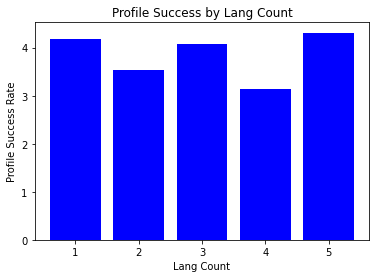

In [ ]:
def insight2():
  df = pd.read_csv("cleaned_lovoo.csv")
  df = df[["Num_of_langs","Profile_Success_Percentage"]]
  by_langCount = df.groupby("Num_of_langs").mean()
  langs = by_langCount.loc[[1,2,3,4,5]].reset_index()
  plt.bar(langs["Num_of_langs"], langs["Profile_Success_Percentage"], color = "blue")
  plt.xlabel('Lang Count')
  plt.ylabel('Profile Success Rate')
  plt.title('Profile Success by Lang Count')
  plt.show()





############ Function Call ############
insight2()

# Insight 2 Explanation

Based on the lovoo app statistics imported from the first csv file, we were able to display the profile success percentage, measured by dividing number of kisses (lovoo’s equivalent of a tinder match) per user by the number of profile visits. Further, the csv provided demographic data on users such as age, gender, and languages spoken. By mapping the number of languages a user knows to the average profile success percentage, we found that the number of languages a user knows is not a significant factor in determining online dateability. In fact, there was little to no correlation between number of languages spoken and profile success rate. This is seen in the primarily flat bar chart. We hypothesize that it may be more important what languages a user knows rather than how many.

In [ ]:
def insight3():
  frenchdf = pd.read_csv("cleaned_lovoo.csv")
  frenchdf = frenchdf[["French","Profile_Success_Percentage","Num_of_kisses"]]
  frenchdf = frenchdf.groupby(["French"]).mean()

  englishdf = pd.read_csv("cleaned_lovoo.csv")
  englishdf = englishdf[["English","Profile_Success_Percentage","Num_of_kisses"]]
  englishdf = englishdf.groupby(["English"]).mean()

  italiandf = pd.read_csv("cleaned_lovoo.csv")
  italiandf = italiandf[["Italian","Profile_Success_Percentage","Num_of_kisses"]]
  italiandf = italiandf.groupby(["Italian"]).mean()

  germandf = pd.read_csv("cleaned_lovoo.csv")
  germandf = germandf[["German","Profile_Success_Percentage","Num_of_kisses"]]
  germandf = germandf.groupby(["German"]).mean()

  spanishdf = pd.read_csv("cleaned_lovoo.csv")
  spanishdf = spanishdf[["Spanish","Profile_Success_Percentage","Num_of_kisses"]]
  spanishdf = spanishdf.groupby(["Spanish"]).mean()
  
  portdf = pd.read_csv("cleaned_lovoo.csv")
  portdf = portdf[["Portuguese","Profile_Success_Percentage","Num_of_kisses"]]
  portdf = portdf.groupby(["Portuguese"]).mean()

  print(frenchdf)
  print(englishdf)
  print(spanishdf)
  print(germandf)
  print(italiandf)
  print(portdf)




############ Function Call ############
insight3()

        Profile_Success_Percentage  Num_of_kisses
French                                           
False                     3.612878     166.663975
True                      5.473809     132.615111
         Profile_Success_Percentage  Num_of_kisses
English                                           
False                      4.151738     149.793604
True                       4.003333     263.765873
         Profile_Success_Percentage  Num_of_kisses
Spanish                                           
False                      4.149734     155.029238
True                       3.745944     262.054054
        Profile_Success_Percentage  Num_of_kisses
German                                           
False                     5.303198     121.967096
True                      3.506407     176.054757
         Profile_Success_Percentage  Num_of_kisses
Italian                                           
False                      4.140826     154.605682
True                       4.170049    

### Insight 3 Explanation

Based on the previous insight that showed there is little to no correlation between how many languages a user knew and their profile success rate, we were curious as to which language is most successful on lovoo and gets the most “kisses”. We found that Portuguese speakers get the most number of kisses on average while French speakers gets the least amount of kisses. Additionally, the language that has the highest kiss average for non-speakers is French where the kiss average is higher for non-speakers than speakers. It could be that non-French speakers are preferred on lovoo. We’d like to think Python is the language that has the most success in dating though! 

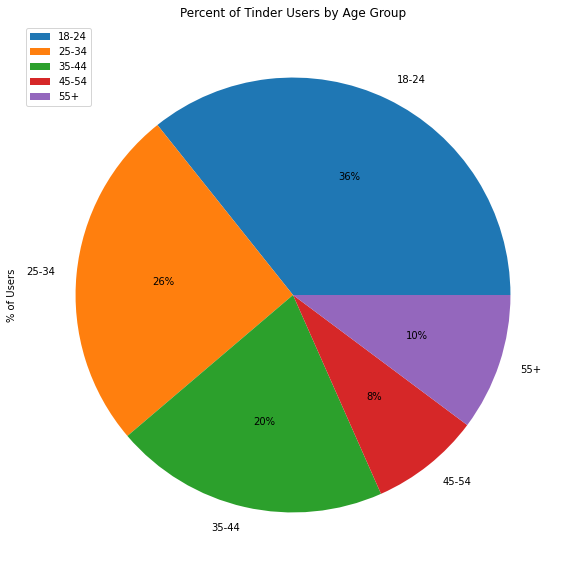

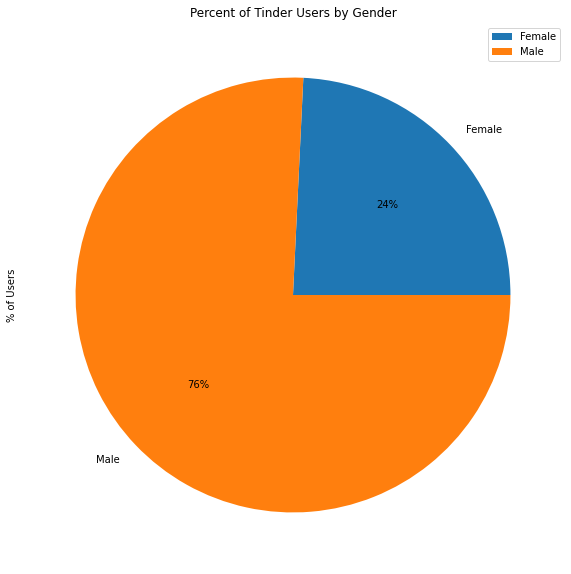

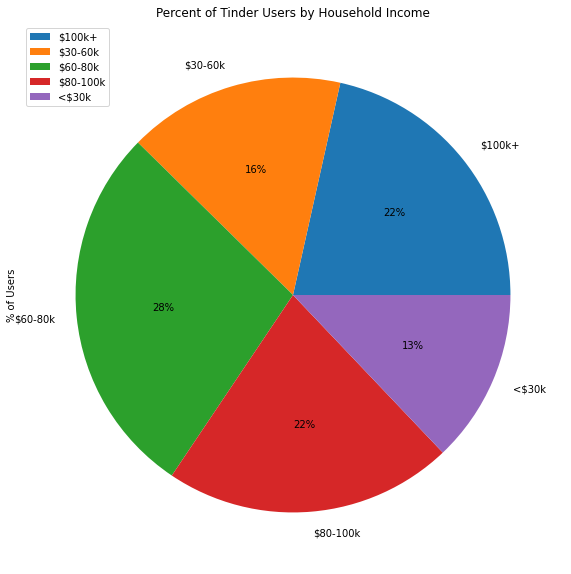

In [ ]:
def insight4():

  df1 = pd.read_csv("/content/Tinder Age Data", delimiter = "\t")
  df2 = pd.read_csv("/content/Tinder Gender Data", delimiter = "\t")
  df3 = pd.read_csv("/content/Tinder Income Data", delimiter = "\t")


  
  df1.groupby(['Ages']).sum().plot(kind='pie', y='% of Users', autopct='%1.0f%%',title='Percent of Tinder Users by Age Group', figsize = (15,10))
  df2.groupby(['Gender']).sum().plot(kind='pie', y='% of Users', autopct='%1.0f%%',title='Percent of Tinder Users by Gender', figsize = (15,10))
  df3.groupby(['Household Income']).sum().plot(kind='pie', y='% of Users', autopct='%1.0f%%',title='Percent of Tinder Users by Household Income', figsize = (15,10))
  
  

 





############ Function Call ############
insight4()

### Insight 4 Explanation

The goal of insight 4 was to summarize the data findings from the first web resource. The pie charts clearly depict the percentage of tinder users based on age group, gender, and household income. The key findings are that 18-24 year old males are most likely to use Tinder and the most common household income of Tinder users is 60 - 80 thousand dollars per year. 

Tinder could use this data to modify its app to appeal more to female users, as only 24% of Tinder users are female. The low percentage of female user may be decreasing the match rate between males and females and females with other females. Additionally, since 18-24 year olds are most likely to use Tinder, Tinder could focus on promoting the app at events with this demographic. 

     Year  Value Per 100,000 People  Total Count  Percent Change in Gonorrhea
0  2015.0                      75.0      41180.0                         0.00
1  2016.0                      66.0      36481.0                       -12.00
2  2017.0                      80.0      44706.0                        21.21
3  2018.0                     101.0      56472.0                        26.25
4  2019.0                     126.0      70922.0                        24.75
5  2020.0                     101.0      57084.0                       -19.84



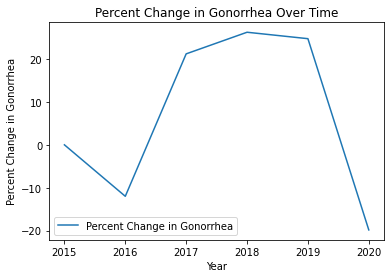

In [ ]:
import matplotlib.pyplot as plt

def insight5():
  df = pd.read_csv("cleanedGonorrheaData.csv")
  del df["Unnamed: 0"]
  df2 = df["Value Per 100,000 People"]
  
  lista = [0]

  for i in range(1, 6):
    difference = float(df2.iloc[i]) - float(df2.iloc[i-1])
    percent_difference = difference/(float(df2.iloc[i-1])) * 100
    lista.append(round(percent_difference, 2))


  df["Percent Change in Gonorrhea"] = lista
  
  print(df)
  print()

  plot = df.plot(kind = "line", x = "Year", y = "Percent Change in Gonorrhea")
  plot.set_xlabel("Year")
  plot.set_ylabel("Percent Change in Gonorrhea")
  plot.set_title("Percent Change in Gonorrhea Over Time")





############ Function Call ############
insight5()

### Insight 5 Explanation

Insight 5 portrays the percent change in gonorrhea between 2015 and 2020. To portray this data, an additional column was added to the scraped date that displays the percent change between each sucessive year. The graph shows that between 2016 and 2019 gonorrhea cases increased, with the sharpest increase between 2016 and 2017. This insight is important as it explains the trend in visualization #3, as 2019 - 2020 and 2015 - 2016 do not match the data trend between 2016 - 2019. 

Interestingly, cases sharply decreased between 2019 and 2020. Future research will explore whether this change was due to the COVID-19 pandemic or other health initiatives. 

## Data Visualizations

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def visual1():
  df = pd.read_csv("cleaned_lovoo.csv")
  df = df[["country", "Profile_Success_Percentage"]]
  df = df.groupby("country").agg(Profile_Success_Rate = ('Profile_Success_Percentage', 'mean'))
  df = df.dropna(axis=0)
  df = df.reset_index()
  two_three = {"AR": "ARG", "AT": "AUT", "AU": "AUS", "BA": "BIH", "BE": "BEL", "BR": "BRA", "CA": "CAN", "CH": "CHE", "CZ": "CZE", "DE": "DEU", "ES": "ESP", "ET": "ETH", "FR":"FRA", "GB": "GBR", "HU": "HUN", "ID": "IDN", "IN": "IND",
               "IT":"ITA", "JM":"JAM", "LI":"LIE", "LR":"LBR", "LU":"LUX","NL":"NLD","PE":"PER","PH":"PHL","RO":"ROU","RU":"RUS","SC":"SYC", "TR":"TUR","UA":"UKR","US":"USA"}
  df2 = pd.DataFrame([two_three]).T
  df2 = df2.reset_index()
  df['country'] = df2['index'].apply(lambda x: two_three[x])
  print(df)
  fig = px.choropleth(df, locations=df["country"], color='Profile_Success_Rate', color_continuous_scale='plasma')
  fig.show()



############ Function Call ############
visual1()

   country  Profile_Success_Rate
0      ARG              4.205000
1      AUT              5.798200
2      AUS              3.795500
3      BIH              5.828333
4      BEL             11.838000
5      BRA              3.970500
6      CAN              2.287500
7      CHE              4.275905
8      CZE              4.173000
9      DEU              3.260187
10     ESP              3.583000
11     ETH              3.149000
12     FRA              5.442659
13     GBR              8.030000
14     HUN              5.698000
15     IDN              3.555000
16     IND              1.657000
17     ITA              4.790807
18     JAM              1.489000
19     LIE              7.089000
20     LBR              6.073000
21     LUX              4.781200
22     NLD              3.558000
23     PER              0.000000
24     PHL              7.435000
25     ROU              3.699500
26     RUS             18.788000
27     SYC              5.485000
28     TUR              5.254000
29     UKR

## **visual1() function Plotly Chloropleth Chart Output**

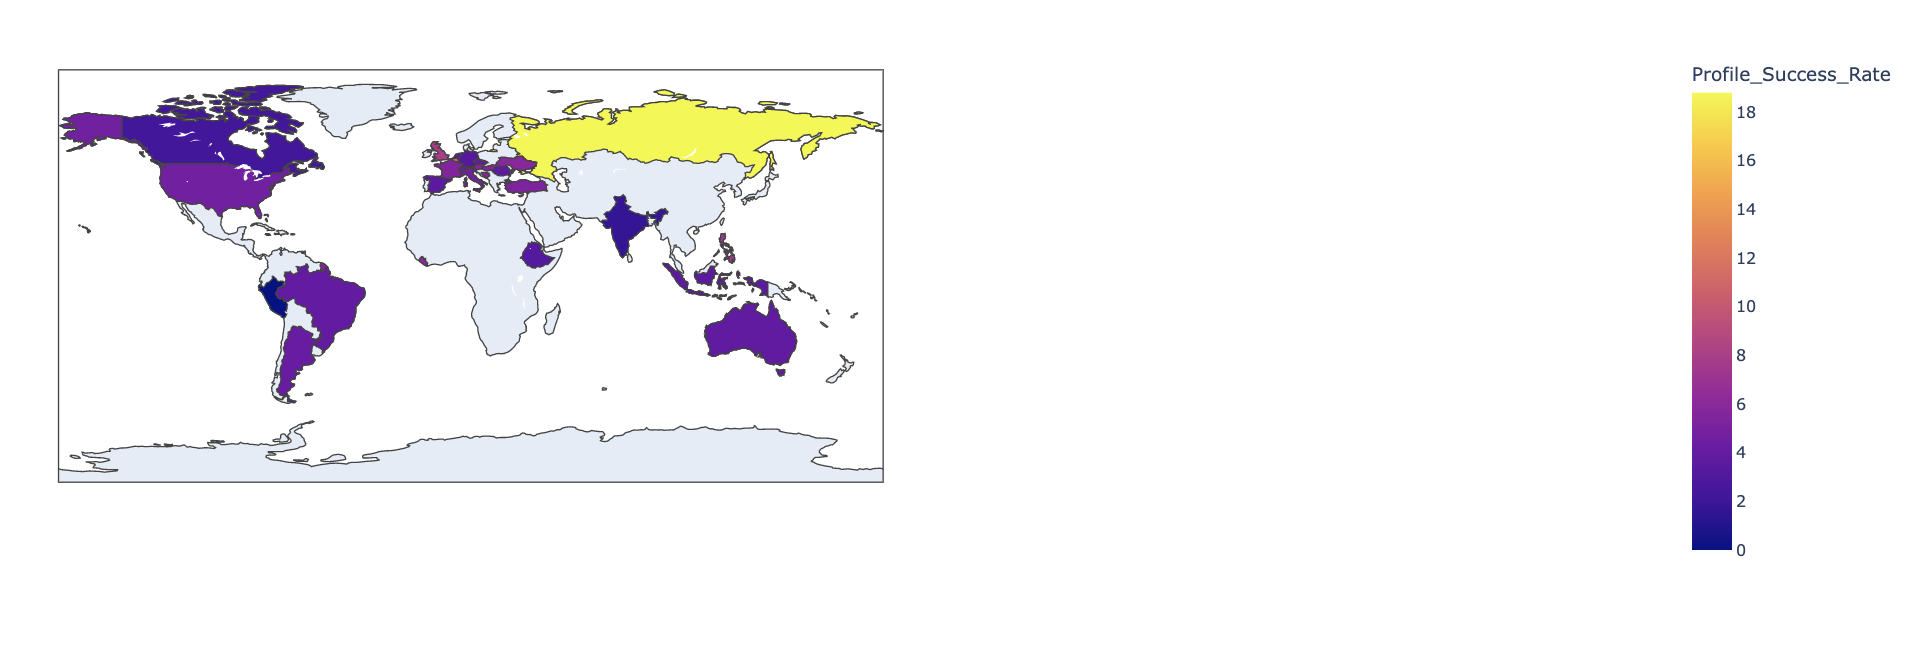

### Visualization 1 Explanation

In this chart, we mapped average profile success rate to country. We then color coded this data. The darker the color, the lower the average profile success rate. Meanwhile, the lighter the color, the higher the average profile success rate. Russia has the highest apparent success rate which is indicated by its bright yellow color on the map. Russia is followed by Belgium and Great Britain, We can conclude that Russian, Belgian, and British users may be preferred on dating apps like lovoo. 

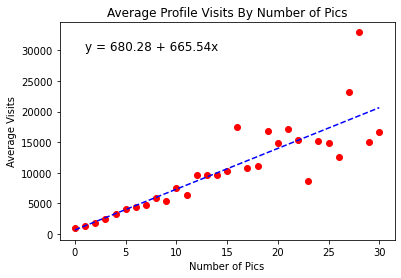

In [ ]:
def visual2(): 
  df = pd.read_csv("cleaned_lovoo.csv")
  df3 = df[["Profile_visits", "Number_of_pics"]]
  df3 = df3.groupby('Number_of_pics').agg(Average_Visits = ('Profile_visits', 'mean'))
  df3 = df3.reset_index()

  
  
  x = df3["Number_of_pics"]
  y = df3["Average_Visits"]

  plt.xlabel("Number of Pics")
  plt.ylabel("Average Visits")
  plt.title("Average Profile Visits By Number of Pics")

  a, b = np.polyfit(x, y, 1)
  plt.scatter(x, y, color = "red")
  plt.plot(x, a*x+b, color = 'blue', linestyle = '--')
  plt.text(1, 30000, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=12)
  plt.show()

  






############ Function Call ############
visual2()

### Visualization 2 Explanation

In this chart, we mapped the number of pictures a user had on their profile to their average profile success rate. We found that generally the more pictures a user posts, the higher their success rate on lovoo is. The red dots on the scatter plot represent the raw data for average profile success rate by number of pictures on a profile. The line of best fit in blue depicts this positive trend. 

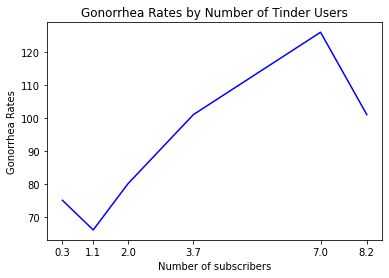

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
def visual3():
  gonodata = pd.read_csv("cleanedGonorrheaData.csv")
  gonodata = gonodata[["Year","Value Per 100,000 People"]]
  subdata = pd.read_csv("Tinder_Subscriber_Data")
  subdata = subdata[["Year","Subscribers(mm)"]]
  #Combining the dataframes on year using inner join 
  masterTable = pd.merge(left=subdata, right=gonodata, on='Year')
  #making the line plot 
  plt.plot(masterTable["Subscribers(mm)"], masterTable["Value Per 100,000 People"], color = 'blue')
  plt.xticks(masterTable["Subscribers(mm)"])
  plt.xlabel('Number of subscribers')
  plt.ylabel('Gonorrhea Rates')
  plt.title("Gonorrhea Rates by Number of Tinder Users")
  plt.show()
############ Function Call ############
visual3()

### Visualization 3 Explanation

This chart depicts British gonorrhea rates compared to number of active Tinder users. Since the UK is the second-largest contributor to Tinder's revenue, if there exists a trend between the two, it can be assumed there is a correlation between the popularity of dating apps like Tinder and gonorrhea, an STD, rates. After mapping the two, there appears to be a clear trend that as the popularity of Tinder increases so do gonorrhea rates. The relationship between the two variables cannot be ignored.

 It is important to note that 2020 did not follow this trend. However, this may be attributed to the 2020 global COVID-19 pandemic. Since people were social distancing, sexual contact and thus the spread of gonorrhea was more limited than in previous years. 


## Summary Files

In [ ]:
import pandas as pd

def summary1():
  df = pd.read_csv("/content/cleaned_lovoo.csv")
  df1 = df[["Gender", "Preferred_gender", "Age", "Number_of_pics", "Profile_visits", "country", "Num_of_langs", "Profile_Success_Percentage"]]
  df1 = df1.groupby("country").agg(Average_Visits = ('Profile_visits', 'mean'), Average_Pics = ("Number_of_pics", "mean"), Max_Profile_Sucess = ("Profile_Success_Percentage", "max"), Average_Profile_Success_Rate = ("Profile_Success_Percentage", "mean"))
  df1 = df1.dropna()
  df1.to_csv("Summary File")
  print(df1)

#displays the average number of profile visits, average number of profile pictures, the maximum profile success rate, and the average profile success rate for dating app users by country. 



############ Function Call ############
summary1()

         Average_Visits  Average_Pics  Max_Profile_Sucess  \
country                                                     
AR          6563.000000      8.000000               4.205   
AT          4425.600000      7.600000              12.088   
AU          5746.000000      7.500000               5.882   
BA          5582.666667     10.000000               9.069   
BE          1383.714286      2.571429              44.186   
BR         26426.000000     17.000000               7.941   
CA         16739.500000      3.500000               4.575   
CH          4751.427704      5.330498              70.588   
CZ          9896.000000      3.000000               4.173   
DE          3166.611035      4.173706              33.333   
ES         10501.166667      2.833333               5.782   
ET          5558.000000      1.000000               3.149   
FR          2200.237578      4.243789             200.000   
GB          1980.000000      5.500000               8.030   
HU         11303.000000 

# Sources



*   https://www.statology.org/line-of-best-fit-python/
*   https://plotly.com/python/choropleth-maps/

